In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import time
import requests
from datetime import datetime, timedelta
from shapely.geometry import Point
from busSim import BusSim
from graph import Graph

In [2]:
def single_map(cato):
    
    # load data from plot data from file
    street = gpd.read_file("./plot/background/street-shp")
    df_cen = gpd.read_file("./plot/background/census_shp")
    gdf = gpd.GeoDataFrame(df_cen, geometry=df_cen.geometry)
    
    menu = pd.read_csv("menu.csv")
    key = menu.loc[cato,"key"]
    fullName = menu.loc[cato,"full_name"]
    
    ax=gdf.plot(column=key, cmap='BuPu',figsize=(12,12),legend=True,alpha=0.35
                 ,legend_kwds={'orientation': "horizontal",
                    'shrink': 0.5,'alpha':0.35,'pad':0.01})
    fig = ax.figure
    cb_ax = fig.axes[1] 
    cb_ax.tick_params(labelsize=20)
    street.plot(color="darkgray", alpha = .5, ax=ax, zorder=3)
    ax.set_axis_off()    
    ax.title.set_text(fullName)
    
    return ax
    


In [3]:
def print_menu():
    menu = pd.read_csv("menu.csv")
    for ix,row in menu.iterrows():
        print(str(ix)+":"+row["full_name"])

In [18]:
def combine_map(catoes,ratio):
    
    if len(catoes)!=len(ratio):
         raise Exception('the number of catoes and ratio should be the same')
            
    processDic = {}
    for idx in range(len(catoes)):
        processDic[catoes[idx]] = ratio[idx]/sum(ratio)
        
    # load data from plot data from file
    street = gpd.read_file("./plot/background/street-shp")
    df_cen = gpd.read_file("./plot/background/standardized_census_shp")
    menu = pd.read_csv("menu.csv")
    df_cen['utility_map'] = 0
    
    # construct the utility function
    for cato in catoes:
        key = menu.loc[cato,"key"]
        df_cen['utility_map'] += processDic[cato]*df_cen[key]
    print(df_cen['utility_map'])
    gdf = gpd.GeoDataFrame(df_cen, geometry=df_cen.geometry)
    ax=gdf.plot(column='utility_map', cmap='RdBu',figsize=(12,12),legend=True,alpha=1
                 ,legend_kwds={'orientation': "horizontal",
                    'shrink': 0.5,'alpha':0.35,'pad':0.01})
    fig = ax.figure
    cb_ax = fig.axes[1] 
    cb_ax.tick_params(labelsize=20)   
    street.plot(color="darkgray", alpha = .5, ax=ax, zorder=3)
    ax.set_axis_off()
    return ax
    


In [5]:
print_menu()

0:Land Area (acres)
1:Housing Units (Census 2010)
2:Owner Occupied Homes (Census 2010)
3:Total Population (Census 2010)
4:Young Children - Age 0 to 4 (Census 2010)
5:Youth Population - Age 0 to 17 (Census 2010)
6:Senior Population - Age 65 and Over (Census 2010)
7:White (Census 2010)
8:Black or African American (Census 2010)
9:Asian (Census 2010)
10:Other Races or Multiracial (Census 2010)
11:Hispanic or Latino (Census 2010)
12:Total Households (Census 2010)
13:Family Households (Census 2010)
14:Families with Children (Census 2010)
15:Female Headed Families with Children (Census 2010)
16:Madison Dwelling Units
17:Madison Subsidized Dwelling Units
18:Campus Dwelling Units
19:Median Year Built
20:Property Foreclosures
21:Owner Occupied Houses: Average Value
22:Owner Occupied Houses: Square Foot Value
23:Condos: Average Value
24:Condos: Square Foot Value
25:Non-Owner Occupied Houses: Average Value
26:Non-Owner Occupied Houses: Square Foot Value
27:Reported Police Incidents: Person Related

0     0.740113
1    -0.084162
2    -0.327357
3     0.274801
4     0.315982
        ...   
95    0.011849
96   -0.111450
97   -0.256440
98   -0.521333
99    0.705373
Name: utility_map, Length: 100, dtype: float64


<AxesSubplot:>

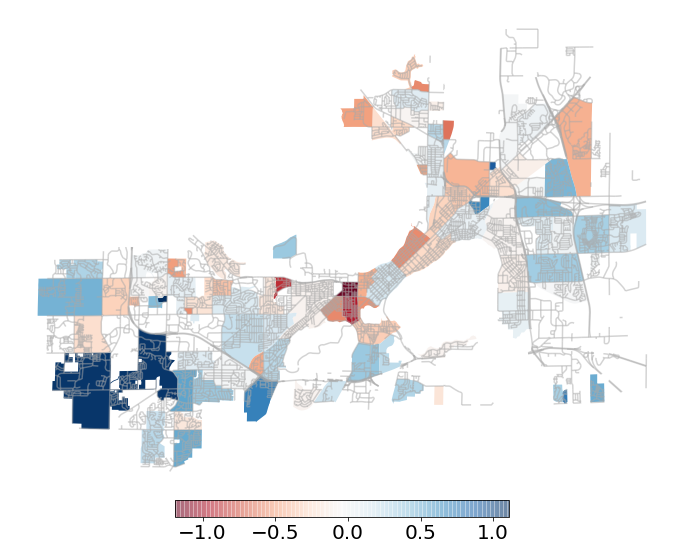

In [19]:
combine_map([3,4,5,6],[0.5,0.2,0.8,0.4])

<AxesSubplot:title={'center':'Available Transit Service'}>

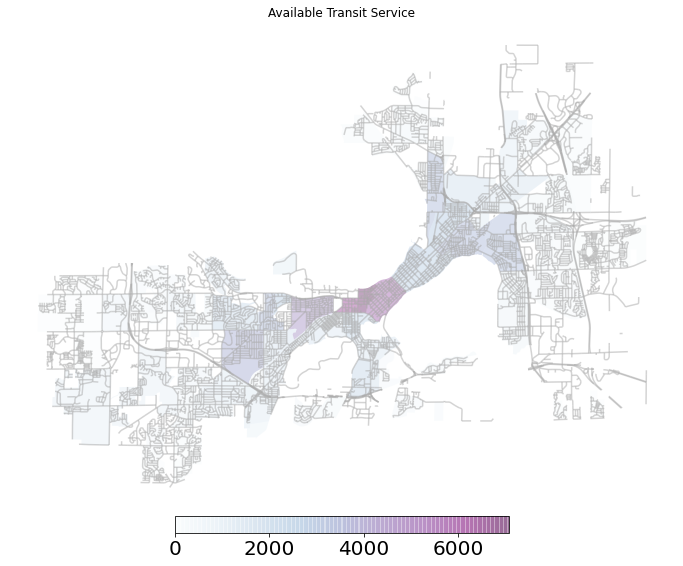

In [16]:
single_map(37)

In [7]:
df_cen = gpd.read_file("./plot/background/census_shp")
df_cen

,name,acres,hu_10,pc_own_10,tot_pop_10,pc_un5_10,pc_un18_10,pc_ov64_10,pc_wht_10,pc_afrm_10,...,crash,prmry_ems,prmry_fire,cc_prvdrs,cc_cpcty,cc_enrlmt,pc_trst,trst_trps,avg_stcnd,geometry
0,Allied Dunn's Marsh Neighborhood Association,218.2,1032,27.6,2356,11.6,34.6,4.1,32.1,33.7,...,46,255,108,9,460,138,95.6,705,5.9,"POLYGON ((-89.44606 43.03474, -89.44586 43.034..."
1,Arbor Hills Neighborhood Association,209.4,469,77.7,1101,4.8,20.2,18.3,75.8,12.0,...,7,106,36,6,198,125,96.1,471,5.8,"POLYGON ((-89.43010 43.03166, -89.43013 43.031..."
2,Bay Creek Neighborhood Association,368.2,1316,44.9,2401,4.8,14.8,11.1,83.6,5.0,...,96,302,119,5,282,215,94.9,1391,5.8,"POLYGON ((-89.38371 43.05837, -89.38357 43.058..."
3,Berkley Oaks Neighborhood Association,128.1,655,31.3,1399,8.6,27.1,10.6,48.8,21.1,...,73,356,139,5,186,130,100.0,504,6.3,"POLYGON ((-89.35315 43.12635, -89.35504 43.122..."
4,Blackhawk Homeowners Association,300.5,961,51.3,2168,6.6,29.3,5.3,83.4,1.5,...,12,181,98,2,88,0,0.0,0,6.7,"POLYGON ((-89.53970 43.08209, -89.53970 43.081..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Wexford Village Homeowners Association,407.6,1231,60.7,2506,4.8,19.7,15.6,84.3,1.6,...,29,313,84,7,353,130,37.3,352,6.3,"POLYGON ((-89.50214 43.08621, -89.50219 43.084..."
96,Whitetail Ridge,62.8,183,94.5,507,7.1,25.4,2.7,76.2,3.9,...,4,15,7,1,7,0,35.6,246,7.8,"POLYGON ((-89.35518 43.14132, -89.35522 43.140..."
97,Wisconsin Co-op Housing Association,74.0,156,96.5,355,1.9,21.2,16.2,91.9,0.4,...,2,11,7,3,105,32,91.0,628,5.7,"POLYGON ((-89.47838 43.06820, -89.47840 43.068..."
98,Woodland Hills Neighborhood Association,94.5,363,71.1,682,4.8,14.8,11.9,81.8,2.1,...,17,54,23,3,111,60,79.4,352,6.6,"POLYGON ((-89.49698 43.07930, -89.49705 43.079..."


In [8]:
df_cen = gpd.read_file("./plot/background/standardized_census_shp")
df_cen

,name,acres,hu_10,pc_own_10,tot_pop_10,pc_un5_10,pc_un18_10,pc_ov64_10,pc_wht_10,pc_afrm_10,...,crash,prmry_ems,prmry_fire,cc_prvdrs,cc_cpcty,cc_enrlmt,pc_trst,trst_trps,avg_stcnd,geometry
0,Allied Dunn's Marsh Neighborhood Association,-0.251670,0.091684,-1.210192,0.156126,1.486392,1.619459,-0.661736,-2.324335,2.667314,...,-0.060713,0.138169,-0.019709,0.882736,1.333231,0.105361,0.666184,-0.262468,-0.665217,"POLYGON ((-89.44606 43.03474, -89.44586 43.034..."
1,Arbor Hills Neighborhood Association,-0.279642,-0.429025,0.647933,-0.422886,-0.579729,-0.080760,0.580222,0.111479,0.376823,...,-0.667844,-0.415994,-0.434626,0.112908,-0.112215,-0.007557,0.682994,-0.440583,-0.778157,"POLYGON ((-89.43010 43.03166, -89.43013 43.031..."
2,Bay Creek Neighborhood Association,0.225128,0.354350,-0.568564,0.176887,-0.579729,-0.718343,-0.049503,0.546247,-0.362045,...,0.717660,0.312972,0.043682,-0.143701,0.351210,0.774181,0.642650,0.259697,-0.778157,"POLYGON ((-89.38371 43.05837, -89.38357 43.058..."
3,Berkley Oaks Neighborhood Association,-0.538066,-0.256997,-1.072965,-0.285400,0.574868,0.733928,-0.093234,-1.393486,1.337352,...,0.359609,0.513810,0.158937,-0.143701,-0.178419,0.035873,0.814113,-0.415464,-0.213457,"POLYGON ((-89.35315 43.12635, -89.35504 43.122..."
4,Blackhawk Homeowners Association,0.009933,0.026017,-0.331199,0.069389,-0.032815,0.993684,-0.556782,0.535099,-0.731480,...,-0.590007,-0.137053,-0.077336,-0.913530,-0.719082,-1.093303,-2.547907,-0.799096,0.238303,"POLYGON ((-89.53970 43.08209, -89.53970 43.081..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Wexford Village Homeowners Association,0.350367,0.275735,0.017432,0.225330,-0.579729,-0.139796,0.344075,0.585264,-0.720924,...,-0.325360,0.353883,-0.158014,0.369518,0.742915,0.035873,-1.293873,-0.531163,-0.213457,"POLYGON ((-89.50214 43.08621, -89.50219 43.084..."
96,Whitetail Ridge,-0.745632,-0.693541,1.271017,-0.696937,0.119106,0.533208,-0.784183,0.133775,-0.478153,...,-0.714547,-0.754443,-0.601746,-1.170139,-1.165957,-1.093303,-1.351028,-0.611847,1.480643,"POLYGON ((-89.35518 43.14132, -89.35522 43.140..."
97,Wisconsin Co-op Housing Association,-0.710031,-0.718513,1.345193,-0.767064,-1.460869,0.037310,0.396552,1.008884,-0.847587,...,-0.745682,-0.769320,-0.601746,-0.656920,-0.625293,-0.815352,0.511531,-0.321078,-0.891097,"POLYGON ((-89.47838 43.06820, -89.47840 43.068..."
98,Woodland Hills Neighborhood Association,-0.644869,-0.527062,0.403150,-0.616198,-0.579729,-0.718343,0.020466,0.445916,-0.668148,...,-0.512170,-0.609394,-0.509542,-0.656920,-0.592192,-0.572145,0.121537,-0.531163,0.125363,"POLYGON ((-89.49698 43.07930, -89.49705 43.079..."
